In [34]:
#libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error,r2_score,confusion_matrix,accuracy_score

OUESTION 1. DIABETES DATA

In [12]:
#1.1.load dataset
data = pd.read_excel("Diabetes_Data.xlsx")
print(data.shape)
X = data.iloc[:,0:10]
y = data.iloc[:,10]
fulldata = data.iloc[:,0:11]
correlation_matrix = fulldata.corr()
print("CORRELATION MATRIX")
print(correlation_matrix)

(442, 11)
CORRELATION MATRIX
          AGE       SEX       BMI        BP        S1        S2        S3  \
AGE  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
SEX  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
BMI  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
BP   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
S1   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
S2   0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
S3  -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
S4   0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
S5   0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
S6   0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
Y    0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

           S4        S5        S6         Y  


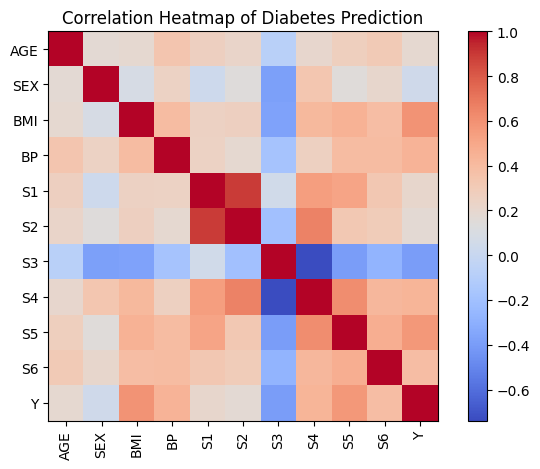

In [ ]:
#HEATMAP OF MATRIX
plt.Figure(figsize=(8,6))
plt.imshow(correlation_matrix, cmap='coolwarm' , interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns , rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Heatmap of Diabetes Prediction")
plt.tight_layout()
plt.show()

In [14]:
#1.3. LINEAR MODEL 
model = LinearRegression()
model.fit(X , y)
y_pred = model.predict(X)
mse = mean_squared_error(y,y_pred)
r2 = r2_score(y,y_pred)
n = X.shape[0]
p = X.shape[1]

adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print("MSE:",mse)
print("Adjusted R2:",adj_r2)
print()
print()
print()
X_const = sm.add_constant(X)
ols_model = sm.OLS(y, X_const).fit()
print(ols_model.summary())

MSE: 2859.6963475867506
Adjusted R2: 0.5065592904853231



                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           3.83e-62
Time:                        07:01:42   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [19]:
#1.5 SELECTIONS OF VARIABLES
remaining = list(X.columns)
selected = []
current_score = float ('inf')

while remaining:
    scores = []
    for candidate in remaining:
        features = selected + [candidate]
        X_candidate = sm.add_constant(X[features])
        model = sm.OLS(y,X_candidate).fit()
        scores.append((model.aic, candidate))
    scores.sort()
    best_new_score,best_candidate = scores[0]

    if best_new_score < current_score:
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        current_score = best_new_score
    
    else:
        break

print ("selected variables:",selected)
print()
print()
print()

X_step = sm.add_constant(X[selected])
step_model = sm.OLS(y,X_step).fit()
print(step_model.summary())

    


selected variables: ['BMI', 'S5', 'BP', 'S1', 'SEX', 'S2']



                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     76.95
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           3.01e-65
Time:                        07:03:08   Log-Likelihood:                -2387.3
No. Observations:                 442   AIC:                             4789.
Df Residuals:                     435   BIC:                             4817.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

2.TITANIC DATA 


In [25]:
#2.2. load data and probability for survival for each passenger
df = pd.read_csv("titanic3.csv")
survival_probability = df["survived"].mean()
print("Probability of survival for a passenger on a titanic is ",survival_probability)

Probability of survival for a passenger on a titanic is  0.3819709702062643


In [26]:
#2.3. survival probability table
df['age_group'] = pd.cut(
    df['age'],
    bins=[0,12,18,60,100],
    labels=['child','Teen','Adult','Senior']

)


survival_table=(
    df
    .groupby(['pclass', 'sex', 'age_group'])['survived']
    .mean()
    .reset_index()
)
print("SURVIVAL TABLE BASED ON PASSENGER CLASS,AGE AND SEX")
survival_table

SURVIVAL TABLE BASED ON PASSENGER CLASS,AGE AND SEX


C:\Users\sam\AppData\Local\Temp\ipykernel_1208\113243353.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['pclass', 'sex', 'age_group'])['survived']


,pclass,sex,age_group,survived
0,1,female,child,0.000000
1,1,female,Teen,1.000000
2,1,female,Adult,0.973684
3,1,female,Senior,0.833333
4,1,male,child,1.000000
5,1,male,Teen,0.500000
6,1,male,Adult,0.359375
7,1,male,Senior,0.066667
8,2,female,child,1.000000
9,2,female,Teen,0.875000


In [27]:
#2.4.logistic regression model
df_model = df[['survived','pclass','age','sex']].dropna()
le = LabelEncoder()
df_model['sex'] = le.fit_transform(df_model['sex'])
X = df_model[['pclass', 'sex', 'age']]
X = sm.add_constant(X)
y = df_model['survived']

logit_model = sm.Logit(y,X)
result = logit_model.fit()
result.summary()


Optimization terminated successfully.
         Current function value: 0.469897
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 1046
Model:                          Logit   Df Residuals:                     1042
Method:                           MLE   Df Model:                            3
Date:                Sat, 10 Jan 2026   Pseudo R-squ.:                  0.3051
Time:                        07:05:14   Log-Likelihood:                -491.51
converged:                       True   LL-Null:                       -707.31
Covariance Type:            nonrobust   LLR p-value:                 3.167e-93
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5893      0.406     11.311      0.000       3.794       5.385
pclass        -1.1332      0.112    -10.142      0.000      -1.352      -0.914
sex           -2.4974      0.166    -15.033      0.000      -2.823      -2.172
age           -0.0339      0.006     -5.395      0.000      -0.046      -0.022
==============================================================================
"""

In [28]:
y_pred_prob = result.predict(X)
y_pred = (y_pred_prob >= 0.5).astype(int)

In [29]:
#2.5. performance based on accuracy
cm = confusion_matrix(y,y_pred)
accuracy = accuracy_score(y,y_pred)
cm,accuracy

(array([[523,  96],
        [126, 301]]),
 0.7877629063097514)

In [35]:
#3.3 using yf to download 30 stocks
tickers = [
    'MMM','AXP','AMGN','AAPL','BA','CAT','CVX','CSCO','KO','DIS',
    'DOW','GS','HD','HON','IBM','INTC','JNJ','JPM','MCD','MRK',
    'MSFT','NKE','PG','CRM','TRV','UNH','VZ','V','AMZN','WMT'
    ]
data = yf.download(
    tickers,
    start="2020-01-01",
    end='2021-01-01',
    auto_adjust=False,
    threads=False,
    progress=False
    
)


prices = data['Adj Close'] 
prices = prices.dropna(axis=1,how="all")
returns = np.log(prices/prices.shift(1)).dropna()


In [36]:
#3.3 correlation matrix for the 30 stocks
cor_matrix = returns.corr()
print("correlation matrix for the 30 stocks")
print (cor_matrix)

correlation matrix for the 30 stocks
Ticker      AAPL      AMGN      AMZN       AXP        BA       CAT       CRM  \
Ticker                                                                         
AAPL    1.000000  0.618982  0.702850  0.523508  0.481118  0.504335  0.645928   
AMGN    0.618982  1.000000  0.530618  0.439791  0.297789  0.518646  0.505381   
AMZN    0.702850  0.530618  1.000000  0.238821  0.244961  0.278685  0.612085   
AXP     0.523508  0.439791  0.238821  1.000000  0.754731  0.719376  0.441406   
BA      0.481118  0.297789  0.244961  0.754731  1.000000  0.592273  0.399481   
CAT     0.504335  0.518646  0.278685  0.719376  0.592273  1.000000  0.400818   
CRM     0.645928  0.505381  0.612085  0.441406  0.399481  0.400818  1.000000   
CSCO    0.660014  0.640448  0.499830  0.619692  0.503541  0.664969  0.535380   
CVX     0.497492  0.450472  0.227998  0.804649  0.695048  0.682067  0.426367   
DIS     0.530979  0.421763  0.381017  0.763354  0.643900  0.672901  0.464960   
DOW

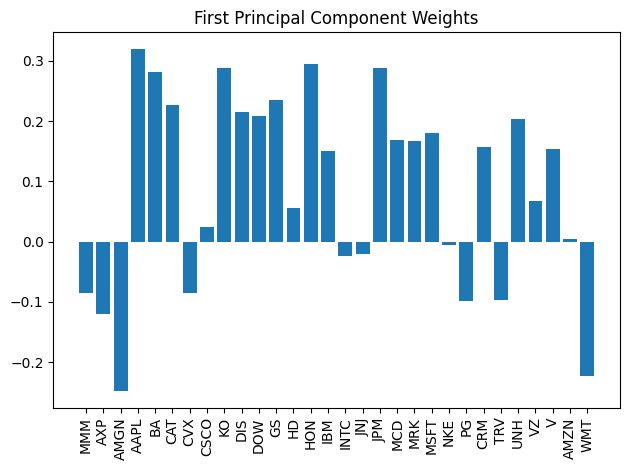

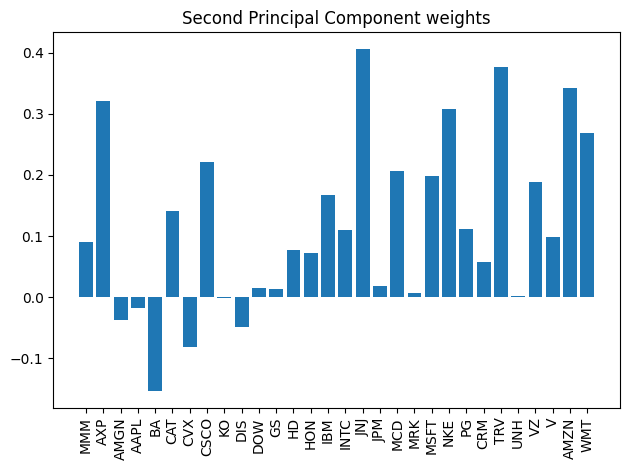

In [ ]:
#3.3 BAR GRAPHS TO SHOW THE WEIGHT OF EACH STOCK FOR FIRST AND SECOND PRINCIPAL COMPONENT
pca = PCA()
pca.fit(cor_matrix)

eigenvectors = pca.components_
eigenvalues = pca.explained_variance_
plt.figure()
plt.bar(tickers,eigenvectors[0])
plt.xticks(rotation=90)
plt.title("First Principal Component Weights")
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(tickers,eigenvectors[1])
plt.xticks(rotation=90)
plt.title("Second Principal Component weights")
plt.tight_layout()
plt.show()

In [ ]:
#3.4 amount of variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
explained_variance_ratio

array([5.56510420e-01, 1.43366568e-01, 1.05750382e-01, 3.90222651e-02,
       2.69600579e-02, 2.12606220e-02, 1.93012740e-02, 1.46413269e-02,
       1.15379698e-02, 1.08216236e-02, 7.46233813e-03, 6.37854328e-03,
       5.39584601e-03, 4.46607433e-03, 4.36517473e-03, 3.92093712e-03,
       3.20949405e-03, 3.09995788e-03, 2.63353529e-03, 2.02069321e-03,
       1.59074108e-03, 1.33064476e-03, 1.25307567e-03, 1.11256918e-03,
       8.65536432e-04, 5.67871596e-04, 5.40944753e-04, 3.75704241e-04,
       2.37809455e-04, 9.29541073e-32])

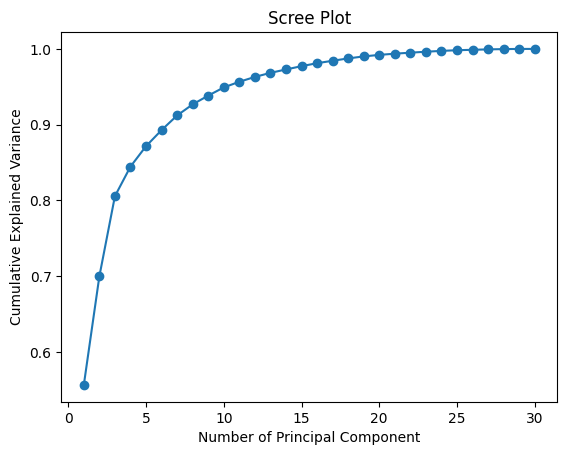

In [39]:
plt.figure()
plt.plot(range(1,len(explained_variance_ratio)+1),
         cumulative_variance,
         marker='o')
plt.xlabel("Number of Principal Component")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.show()

In [40]:
np.where(cumulative_variance >= 0.95)[0][0] + 1

np.int64(11)

In [41]:
scores = pca.transform(cor_matrix)
pc_scores = pd.DataFrame(scores[:, :2],index=tickers,columns=['PC1','PC2'])

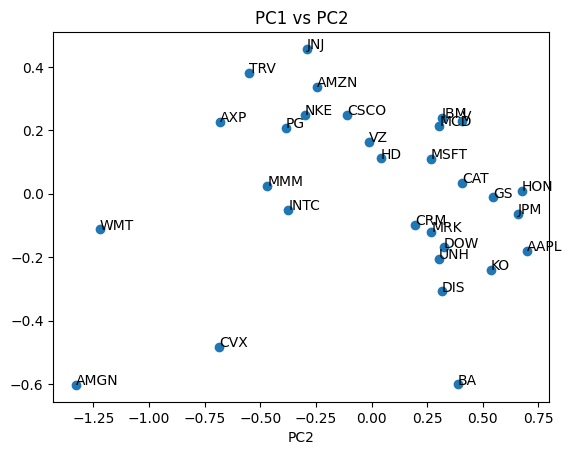

In [42]:
plt.figure()
plt.scatter(pc_scores['PC1'], pc_scores['PC2'])

for stock in pc_scores.index:
    plt.text(pc_scores.loc[stock, 'PC1'],
             pc_scores.loc[stock,'PC2'],
             stock)
    
plt.xlabel('PC1')
plt.xlabel('PC2')
plt.title("PC1 vs PC2")
plt.show()

In [ ]:
#3.5
mean_point = pc_scores.mean()


distances = np.sqrt(
    (pc_scores['PC1'] - mean_point['PC1'])**2 +
    (pc_scores['PC2'] - mean_point['PC1'])**2
     
     )
distances.sort_values(ascending=False).head(3)

AMGN    1.459615
WMT     1.227651
CVX     0.838782
dtype: float64